In [49]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Read images in grayscale and store it in images list

mydir = os.getcwd()
data_dir = os.path.join(mydir,'yalefaces')
img_names = os.listdir(data_dir)

images = []
for file in img_names:
    file_path = os.path.join(data_dir,file)
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
        
print(images[0].shape)
print(len(images))

(231, 195)
165


In [51]:
# Function to shrink and Vectorize an image
def vectorize_image(image):
    image = cv2.resize(image, (65,77), interpolation = cv2.INTER_AREA)
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec/(np.linalg.norm(img_vec))
    return img_vec_norm

In [52]:
# Store image vectors in a list
imgs_vec = []
for image in images:
    img_vec_norm = vectorize_image(image)
    imgs_vec.append(img_vec_norm)

print(len(imgs_vec))
print(imgs_vec[0].shape)

165
(5005,)


## Locality Sensitive Hashing

In [53]:
# Function to generate 'm' random unit vectors for Hashing
def genRandomHashVec(m,length):
    hash_vec = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        v_ =  v/(np.linalg.norm(v))
        hash_vec.append(v_)
    return hash_vec

In [54]:
# Function for Local Sensitive Hashing
def LSH(hash_vecs,data_pt):
    hash_code = []
    for i in range(len(hash_vecs)):
        if np.dot(data_pt,hash_vecs[i])>0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code

In [55]:
# Generate 10 random vectors of the same size as the image vector
hash_vectors = genRandomHashVec(10,len(imgs_vec[0]))
#print(hash_vectors[:][:10])

In [56]:
# Test the LSHash function 
LSH(hash_vectors,imgs_vec[0])

['1', '0', '1', '0', '0', '0', '1', '1', '1', '0']

In [57]:
# Creating an Image Dictionary using the hash as the keys
image_dict = {}
for i in range(len(imgs_vec)):
    hash_code = LSH(hash_vectors,imgs_vec[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)

In [58]:
# Displaying the Hashes
col_names = ['Hash_codes','Image_Index']
df = pd.DataFrame(image_dict.items(),columns = col_names)
df.head(30)

,Hash_codes,Image_Index
0,1010001110,"[0, 1, 2, 5, 9, 12, 109, 117, 128, 129, 131]"
1,1010000110,"[3, 7, 11, 13, 14, 15, 16, 18, 19, 21, 24, 26,..."
2,1010011110,"[4, 8, 105, 110, 118, 120]"
3,1110111110,[6]
4,1110000110,"[10, 22, 23, 25, 29, 30, 31, 33, 34, 35, 40, 4..."
5,1010110110,"[17, 53, 92, 93, 98, 112]"
6,1010010110,"[20, 96, 113]"
7,1110110110,"[28, 50, 72, 94, 119, 149, 160]"
8,1110010110,"[32, 63, 65, 111, 115]"
9,1110101110,[39]


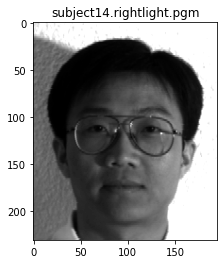

In [59]:
plt.title(img_names[149])
plt.imshow(images[149], cmap='gray')
    
plt.show()

In [60]:
# Creating hash for a query image
query_image = images[149]
query_image_vector = vectorize_image(query_image)
query_image_hashcode = LSH(hash_vectors, query_image_vector)
query_image_str_hashcode = ''.join(query_image_hashcode)
print(query_image_str_hashcode)

1110110110


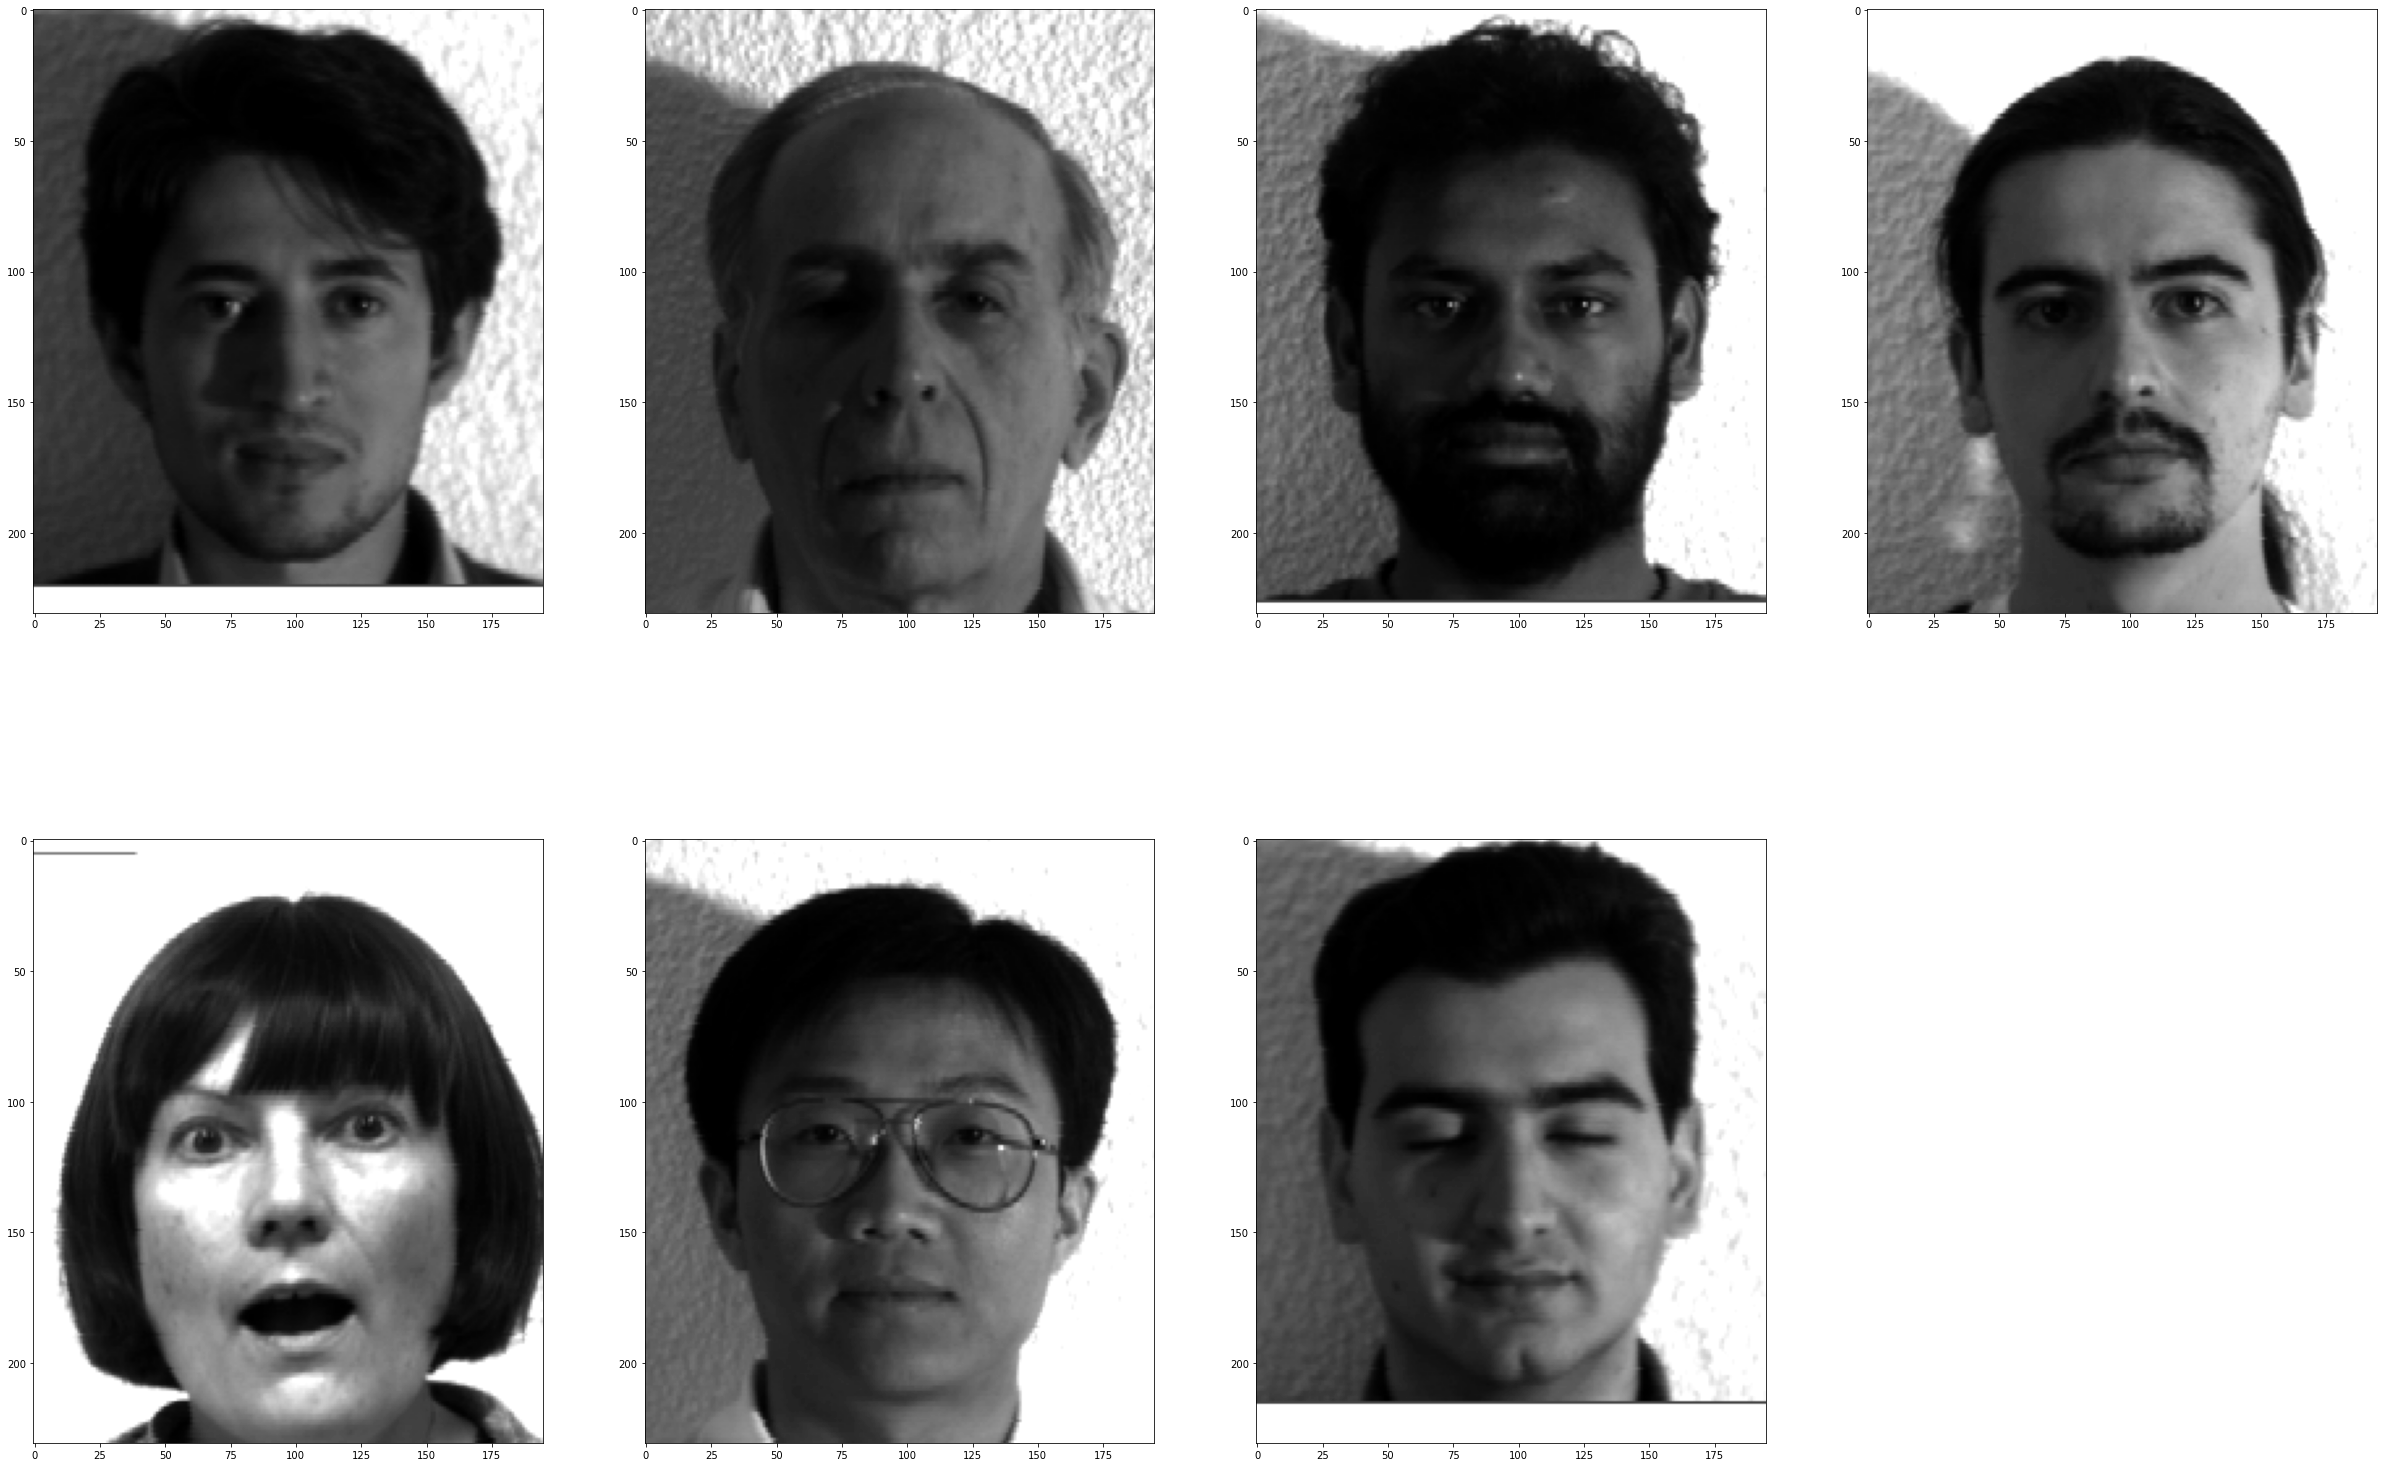

In [61]:
# Plotting images with same hash code as query image
keys = list(image_dict.keys())
values = list(image_dict.values())
idx = keys.index(query_image_str_hashcode)

igs = [images[i] for i in range(len(images)) if i in values[idx]]
fig = plt.figure()
rows = 2
n_images = len(igs)
for n,image in zip(range(n_images),igs):
    ax = fig.add_subplot(rows,int(np.ceil(n_images/rows)),n+1)
    plt.imshow(image, cmap='gray')
fig.set_size_inches(np.array(fig.get_size_inches())*n_images)
plt.show()